<font size="+5">#03. Decision Tree. A Supervised Classification Model</font>

# Load the Data

> Load the Titanic dataset with the below commands
> - This dataset **people** (rows) aboard the Titanic
> - And their **sociological characteristics** (columns)
> - The aim of this dataset is to predict the probability to `survive`
> - Based on the social demographic characteristics.

In [14]:
import seaborn as sns

df = sns.load_dataset(name='titanic').iloc[:, :4]

# `DecisionTreeClassifier()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [15]:
fit()

NameError: name 'fit' is not defined

In [16]:
algo.fit()

NameError: name 'algo' is not defined

In [17]:
model = DecisionTreeClassifier()

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = DecisionTreeClassifier()

In [20]:
model.fit

<bound method DecisionTreeClassifier.fit of DecisionTreeClassifier()>

### Separate Variables for the Model

> Regarding their role:
> 1. **Target Variable `y`**
>
> - [ ] What would you like **to predict**?
>
> Total number of accients? Or Alcohol?
>
> 2. **Explanatory Variable `X`**
>
> - [ ] Which variable will you use **to explain** the target?

In [24]:
df.drop("survived")

KeyError: "['survived'] not found in axis"

In [28]:
df.drop(labels="survived", axis=1)

,pclass,sex,age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,NaN
889,1,male,26.0


In [30]:
explanatory = df.drop(columns='survived')

In [34]:
target = df.survived

### Finally `fit()` the Model

In [36]:
model.fit(X=explanatory,y=target)

ValueError: could not convert string to float: 'male'

In [38]:
import pandas as pd

In [40]:
df = pd.get_dummies(data=df, drop_first=True)

In [41]:
explanatory = df.drop(columns='survived')
target = df.survived

In [42]:
model.fit(X=explanatory,y=target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [44]:
df.sample(10)

,survived,pclass,age,sex_male
493,0,1,71.0,1
328,1,3,31.0,0
643,1,3,NaN,1
486,1,1,35.0,0
697,1,3,NaN,0
810,0,3,26.0,1
679,1,1,36.0,1
177,0,1,50.0,0
824,0,3,2.0,1
795,0,2,39.0,1


In [46]:
df

,survived,pclass,age,sex_male
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1
...,...,...,...,...
886,0,2,27.0,1
887,1,1,19.0,0
888,0,3,NaN,0
889,1,1,26.0,1


In [49]:
df = df.dropna().reset_index(drop=True)

In [50]:
explanatory = df.drop(columns='survived')
target = df.survived

In [84]:
model = DecisionTreeClassifier(min_samples_leaf=50)

In [85]:
model.fit(X=explanatory,y=target)

DecisionTreeClassifier(min_samples_leaf=50)

## Calculate a Prediction with the Model

> - `model.predict_proba()`

In [86]:
juana = df.sample()

In [87]:
juana

,survived,pclass,age,sex_male
107,0,2,23.0,1


In [88]:
model.predict_proba(juana)

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- survived
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 4 features, but DecisionTreeClassifier is expecting 3 features as input.

In [89]:
juana = df.sample()

In [90]:
juana_exp = juana.drop(columns='survived')

In [91]:
juana

,survived,pclass,age,sex_male
109,0,1,37.0,1


In [92]:
model.predict_proba(juana_exp)

array([[0.49019608, 0.50980392]])

## Model Visualization

> - `tree.plot_tree()`

In [93]:
from sklearn.tree import plot_tree

In [97]:
import matplotlib.pyplot as plt

In [103]:
explanatory.columns

Index(['pclass', 'age', 'sex_male'], dtype='object')

In [106]:
pepe = juana

In [107]:
pepe

,survived,pclass,age,sex_male
109,0,1,37.0,1


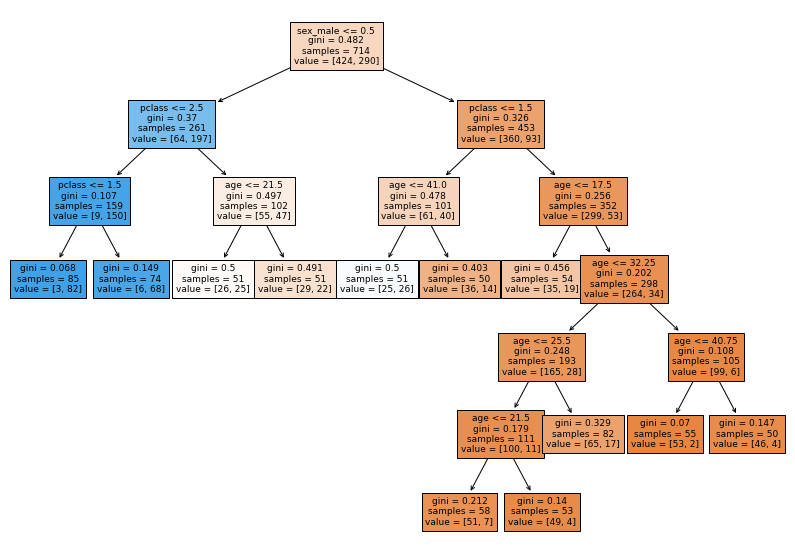

In [104]:
plt.figure(figsize=(14, 10))
plot_tree(decision_tree=model, filled=True, fontsize=9, feature_names=explanatory.columns);

In [108]:
51

51

In [109]:
26/51

0.5098039215686274

In [110]:
model.predict_proba(juana_exp)

array([[0.49019608, 0.50980392]])

In [111]:
model.predict_proba(X=explanatory)

array([[0.9245283 , 0.0754717 ],
       [0.03529412, 0.96470588],
       [0.56862745, 0.43137255],
       ...,
       [0.03529412, 0.96470588],
       [0.49019608, 0.50980392],
       [0.79268293, 0.20731707]])

In [117]:
model.predict_proba(X=explanatory).argmax(axis=1)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,

In [113]:
dfsel = df[['survived']].copy()

In [119]:
dfsel['pred_arbol'] = model.predict(X=explanatory)

## Model Interpretation

> Why `sex` is the most important column? What has to do with **EDA** (Exploratory Data Analysis)?

# Prediction vs Reality

> How good is our model?

## Precision

> - `model.score()`

In [121]:
dfsel.head()

,survived,pred_arbol
0,0,0
1,1,1
2,1,0
3,1,1
4,0,0


In [123]:
dfsel.survived == dfsel.pred_arbol

0       True
1       True
2      False
3       True
4       True
       ...  
709     True
710     True
711     True
712     True
713     True
Length: 714, dtype: bool

In [124]:
(dfsel.survived == dfsel.pred_arbol).sum()

566

In [125]:
(dfsel.survived == dfsel.pred_arbol).sum()/714

0.7927170868347339

In [126]:
(dfsel.survived == dfsel.pred_arbol).mean()

0.7927170868347339

In [128]:
model.score(X=explanatory, y=target)

0.7927170868347339

## Confusion Matrix

> 1. **Sensitivity** (correct prediction on positive value, $y=1$)
> 2. **Specificity** (correct prediction on negative value $y=0$).

In [130]:
from sklearn.metrics import plot_confusion_matrix

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


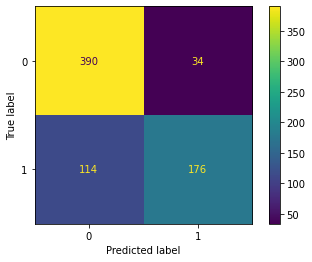

In [131]:
plot_confusion_matrix(estimator=model, X=explanatory, y_true=target)

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay

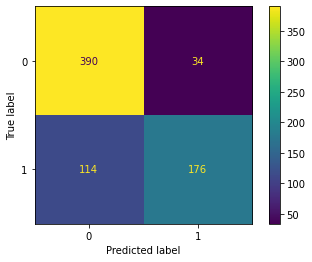

In [133]:
ConfusionMatrixDisplay.from_estimator(estimator=model, X=explanatory, y=target)

In [134]:
176/(176+114)

0.6068965517241379

In [135]:
390/(390+34)

0.9198113207547169

In [136]:
from sklearn.metrics import classification_report

In [138]:
report = classification_report(y_true = target, y_pred = dfsel.pred_arbol)

In [139]:
print(report)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       424
           1       0.84      0.61      0.70       290

    accuracy                           0.79       714
   macro avg       0.81      0.76      0.77       714
weighted avg       0.80      0.79      0.79       714



## ROC Curve

> A way to summarise all the metrics (score, sensitivity & specificity)

In [140]:
from sklearn.metrics import plot_roc_curve

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


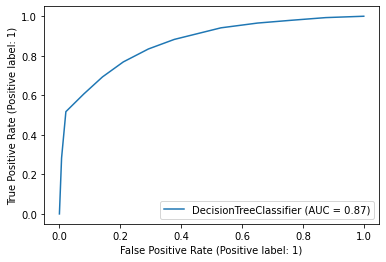

In [141]:
plot_roc_curve(estimator=model, X=explanatory, y=target)